In [136]:
#Financial Data Analysis

In [102]:
#Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [103]:
#Reading the dataset
df = pd.read_csv('onlinefraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [104]:
#Checking if the dataset has any null value or not
print(data.isnull().sum())

step                    0
type              6362620
amount                  0
nameOrig                0
oldbalanceOrg           0
newbalanceOrig          0
nameDest                0
oldbalanceDest          0
newbalanceDest          0
isFraud           6362620
isFlaggedFraud          0
dtype: int64


In [105]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


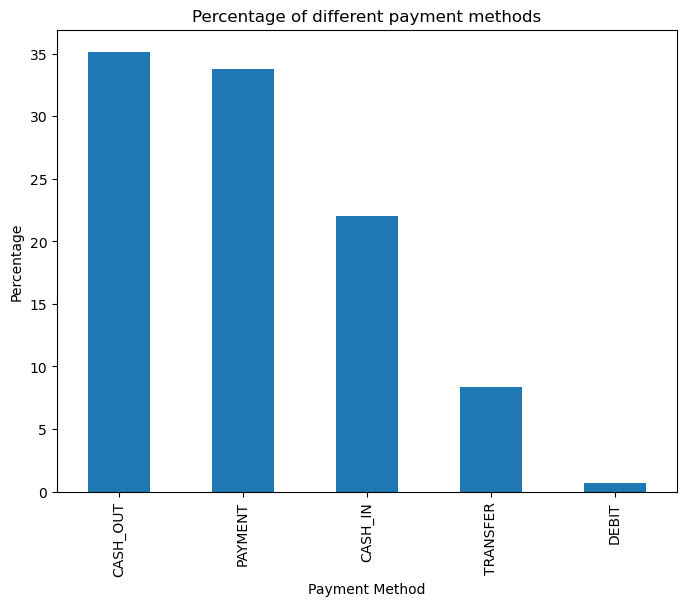

In [106]:
payment_counts = df['type'].value_counts()
payment_percentage = (payment_counts/ payment_counts.sum()) *100

plt.figure(figsize=(8,6))
payment_percentage.plot(kind='bar')

plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.title('Percentage of different payment methods')

plt.show()

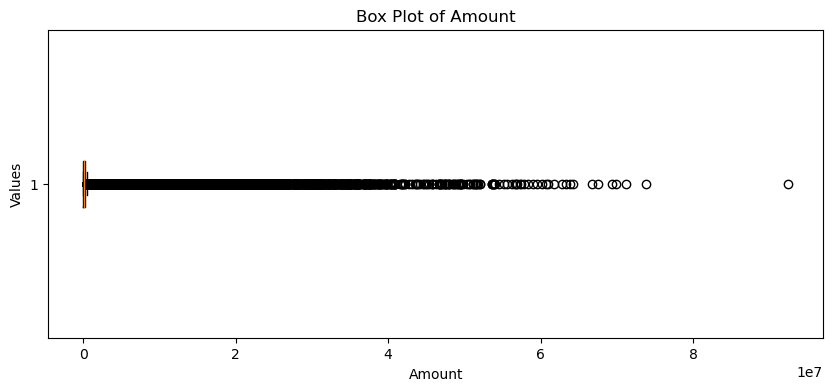

In [107]:
# Checking for outliers

plt.figure(figsize=(10,4))
plt.boxplot(df['amount'],vert= False)

# Setting up of labels & titles
plt.xlabel('Amount')
plt.ylabel('Values')
plt.title('Box Plot of Amount')

# Plot Display
plt.show()

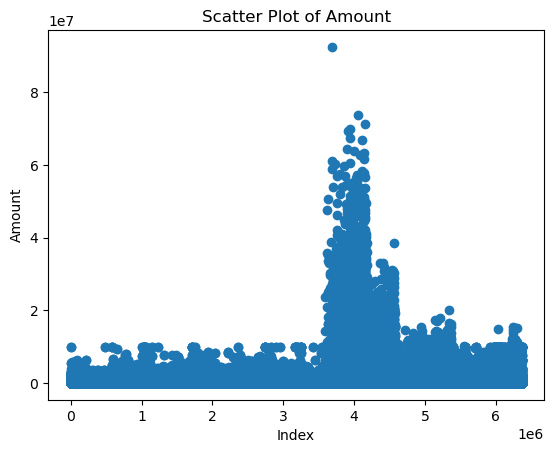

In [108]:
# Checking for outliers

plt.scatter(df.index, df['amount'])


# Setting up of labels & titles
plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount')

# Plot Display
plt.show()

([<matplotlib.patches.Wedge at 0x214000bac90>,
 [Text(-1.099990955625572, 0.004460666087110192, ''),
  Text(1.0999909559371663, -0.004460589247970448, '')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.8709%'),
  Text(0.599995066874818, -0.002433048680711153, '0.1291%')])

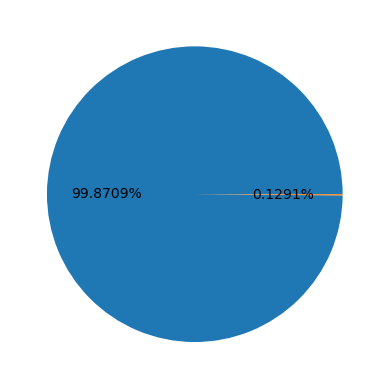

In [109]:
plt.pie(df['isFraud'].value_counts(), autopct='%.4f%%')

In [110]:
df.shape

(6362620, 11)

In [111]:
# deleting duplicates & null values

df=df.dropna()
df=df.drop_duplicates()
df.shape

(6362620, 11)

In [112]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [113]:
#Graphical representation of the Data

type = df["type"].value_counts()
transactions =  type.index
quantity = type.values
import plotly.express as px
figure = px.pie(df, values=quantity, names=transactions, hole=0.5, title="Distribution of Transaction Types")
figure.show()

In [114]:
# Converting transaction type (categorical data) to numerical data
df["type"] = df["type"].replace({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

In [115]:
# Dropping nameOrig, nameDest, isFlaggedFraud (not necessary for model)
df=df.drop(columns=['nameOrig','nameDest','isFlaggedFraud'])

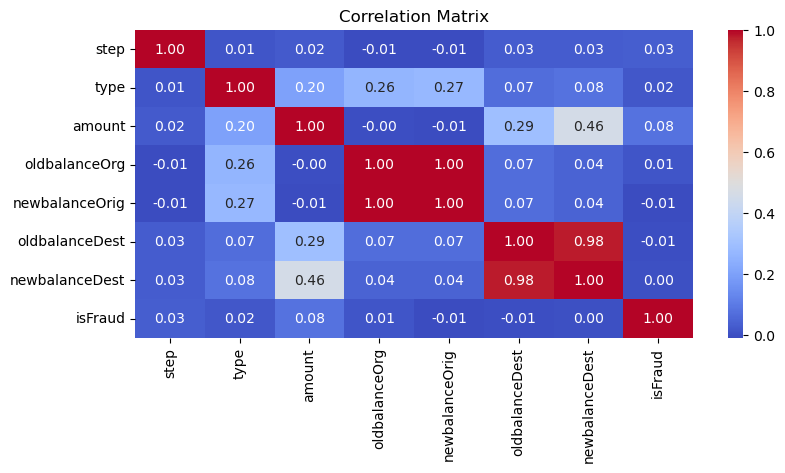

In [116]:
# Correlation heatmap to check features

corr=df.corr()
plt.figure(figsize=(9,4))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [118]:
#The effect of oldbalanceOrg can be explained by newbalanceOrg and same with the oldbalanceDest & newbalanceDest.
#And they also have high collinearity, so instead of dropping them, we will adjust the amounts as per below.
#1. oldbalanceOrg - newbalanceOrg = amount which has been transferred from origin account
#2. newbalanceDest - oldbalanceDest = amount which has been credited to the destination account

df1 = df

df1['Amount_Orig'] = df1.apply(lambda x : x['oldbalanceOrg'] -x['newbalanceOrig'],axis = 1)
df1['Amount_Dest'] = df1.apply(lambda x : x['newbalanceDest'] -x['oldbalanceDest'],axis = 1)

df1 = df1.drop(['oldbalanceOrg','newbalanceOrig','newbalanceDest','oldbalanceDest'],axis=1)

In [119]:
df1.head()

,step,type,amount,isFraud,Amount_Orig,Amount_Dest
0,1,2,9839.64,0,9839.64,0.0
1,1,2,1864.28,0,1864.28,0.0
2,1,4,181.00,1,181.00,0.0
3,1,1,181.00,1,181.00,-21182.0
4,1,2,11668.14,0,11668.14,0.0


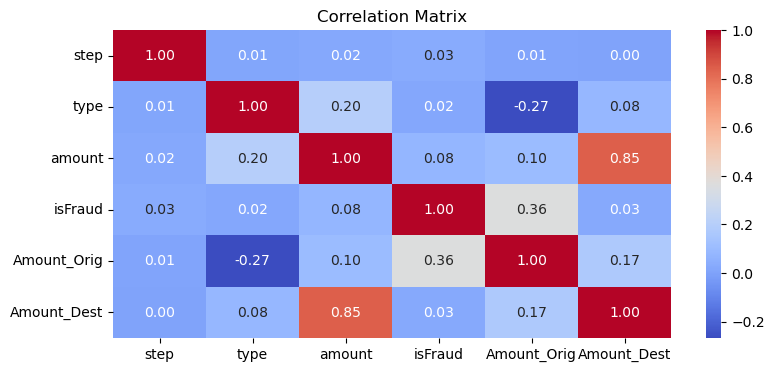

In [121]:
# New Correlation heatmap

corr=df1.corr()
plt.figure(figsize=(9,4))
sb.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [127]:
# Spliting data into train_test_split

x=df1.loc[:, df1.columns!='isFraud']
y=df1['isFraud']
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, stratify=df1['isFraud'], random_state=1)
print(len(df1),len(x_train),len(y_test))

6362620 5090096 1272524


In [128]:
# Model 1 - Decision Tree Classifier

In [129]:
# training model 1

tree=DecisionTreeClassifier(random_state=0, criterion="entropy")
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [130]:
# testing model 1 (DecisionTree)
y_pred=tree.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.81      0.79      0.80      1643

    accuracy                           1.00   1272524
   macro avg       0.91      0.90      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



In [132]:
# Model 2 - Random Forest Classifier

forest=RandomForestClassifier(n_estimators = 10)
forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [133]:
# testing model 2 (RandomForest)

y_pred2=forest.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.96      0.75      0.84      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



In [134]:
df1.head()

,step,type,amount,isFraud,Amount_Orig,Amount_Dest
0,1,2,9839.64,0,9839.64,0.0
1,1,2,1864.28,0,1864.28,0.0
2,1,4,181.00,1,181.00,0.0
3,1,1,181.00,1,181.00,-21182.0
4,1,2,11668.14,0,11668.14,0.0


In [135]:
# Model 3

# Initialize the Logistic Regression model
# The solver 'liblinear' is a good choice for small datasets and binary classification
log_reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)

# Train the model on the training data
log_reg.fit(x_train, y_train)

# Predict the labels for the test set
y_pred = log_reg.predict(x_test)

# Evaluate the model's performance
print("Accuracy on test data: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test data: 1.00
Confusion Matrix:
[[1268717    2164]
 [   1257     386]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.15      0.23      0.18      1643

    accuracy                           1.00   1272524
   macro avg       0.58      0.62      0.59   1272524
weighted avg       1.00      1.00      1.00   1272524

